In [1]:
import skimage
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
#Task 1

In [3]:
from skimage import io, color, data
image = io.imread('cat1.jpg')

In [160]:
def rgb_to_hsv(rgb):
    
    rgb = rgb.astype('float')
    rgb = rgb / 255.0
    max_index = np.argmax(rgb, axis = 2)
    min_index = np.argmin(rgb, axis = 2)
    cmax = np.amax(rgb, axis = 2)
    cmin = np.amin(rgb, axis = 2)
    delta = (cmax - cmin + np.spacing(1))
    hsv = np.zeros(rgb.shape, dtype = 'float')
    hsv[..., 2] = cmax;
    
    hsv[delta == 0, 0] = np.zeros(hsv[delta == 0, 0].shape)
    print(((rgb[..., 1] - rgb[..., 2]) / delta + 6))
    hsv[max_index == 0, 0] = ((60.0 * (((rgb[..., 1] - rgb[..., 2]) / delta) % 6)) / 360.0)[max_index == 0]
    hsv[max_index == 1, 0] = ((60.0 * ((rgb[..., 2] - rgb[..., 0]) / delta + 2)) / 360.0)[max_index == 1]
    hsv[max_index == 2, 0] = ((60.0 * ((rgb[..., 0] - rgb[..., 1]) / delta + 4)) / 360.0)[max_index == 2]
    hsv[cmax == 0, 1] = np.zeros(hsv[cmax == 0, 1].shape)
    hsv[cmax != 0, 1] = (delta / (cmax + np.spacing(1)))[cmax != 0]
    
    return hsv

[[6.81481481 6.81481481 6.81481481 ... 6.         6.         6.        ]
 [6.81481481 6.81481481 6.81481481 ... 6.         6.         6.        ]
 [6.81481481 6.81481481 6.81481481 ... 6.         6.         6.        ]
 ...
 [6.86666667 6.86666667 6.86666667 ... 6.44444444 6.41304348 6.41304348]
 [7.         7.         7.         ... 6.48837209 6.44444444 6.44444444]
 [7.         7.         7.         ... 6.48837209 6.44444444 6.44444444]]


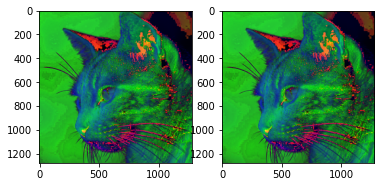

In [161]:
my_hsv_img = rgb_to_hsv(image)
hsv_img = color.rgb2hsv(image)
rows = 1
columns = 2
fig = plt.figure()
fig.add_subplot(rows, columns, 1)
plt.imshow(my_hsv_img)
fig.add_subplot(rows, columns, 2)
plt.imshow(hsv_img)

In [164]:
#Task 2

In [5]:
image = cv2.imread("cat1.jpg")

In [6]:
def changeImage(image, brightness, contrast):
    new_image = np.zeros(image.shape, image.dtype)
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            for c in range(image.shape[2]):
                new_image[y, x, c] = np.clip(contrast * image[y, x, c] + brightness, 0, 255)
    io.imshow(new_image)

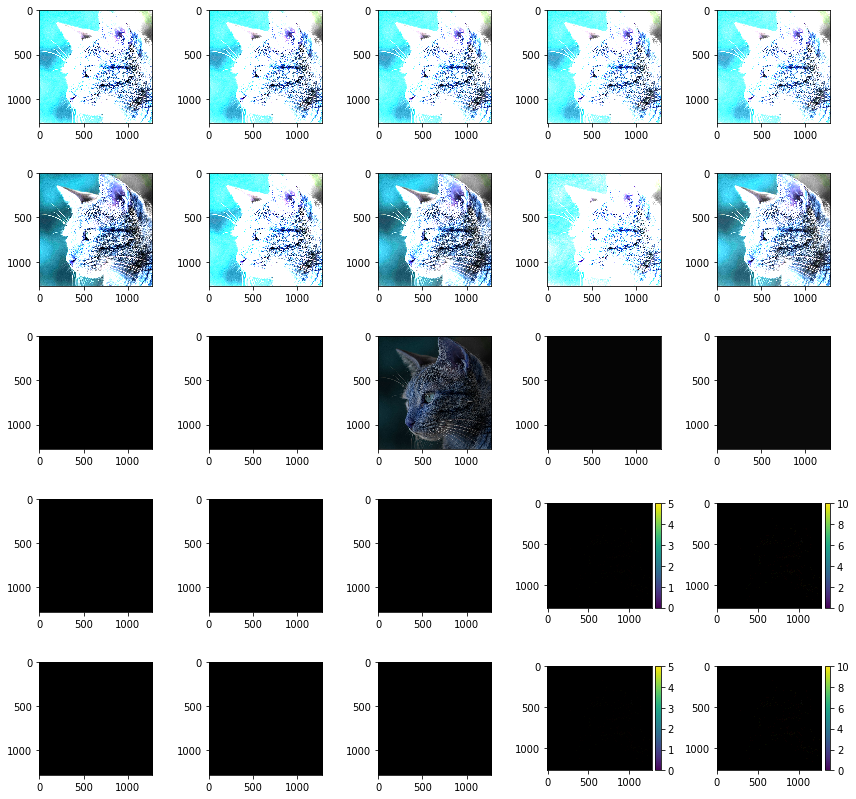

In [8]:
rows = 5
columns = 5
fig = plt.figure(figsize = (12, 12))
fig.add_subplot(rows, columns, 1)
changeImage(image, -10, 10)
fig.add_subplot(rows, columns, 2)
changeImage(image, -5, 10)
fig.add_subplot(rows, columns, 3)
changeImage(image, 0, 10)
fig.add_subplot(rows, columns, 4)
changeImage(image, 5, 10)
fig.add_subplot(rows, columns, 5)
changeImage(image, 10, 10)
fig.add_subplot(rows, columns, 6)
changeImage(image, -10, 5)
fig.add_subplot(rows, columns, 7)
changeImage(image, -10, 10)
fig.add_subplot(rows, columns, 8)
changeImage(image, 0, 5)
fig.add_subplot(rows, columns, 9)
changeImage(image, 5, 15)
fig.add_subplot(rows, columns, 10)
changeImage(image, 10, 5)
fig.add_subplot(rows, columns, 11)
changeImage(image, -10, 0)
fig.add_subplot(rows, columns, 12)
changeImage(image, -5, 0)
fig.add_subplot(rows, columns, 13)
io.imshow(image)
fig.add_subplot(rows, columns, 14)
changeImage(image, 5, 0)
fig.add_subplot(rows, columns, 15)
changeImage(image, 10, 0)
fig.add_subplot(rows, columns, 16)
changeImage(image, -10, -5)
fig.add_subplot(rows, columns, 17)
changeImage(image, -5, -5)
fig.add_subplot(rows, columns, 18)
changeImage(image, 0, -5)
fig.add_subplot(rows, columns, 19)
changeImage(image, 5, -5)
fig.add_subplot(rows, columns, 20)
changeImage(image, 10, -5)
fig.add_subplot(rows, columns, 21)
changeImage(image, -10, -10)
fig.add_subplot(rows, columns, 22)
changeImage(image, -5, -10)
fig.add_subplot(rows, columns, 23)
changeImage(image, 0, -10)
fig.add_subplot(rows, columns, 24)
changeImage(image, 5, -10)
fig.add_subplot(rows, columns, 25)
changeImage(image, 10, -10)
plt.show()

In [ ]:
#Task 3

In [52]:
from skimage.metrics import structural_similarity as ssim

In [80]:
median_blured = cv2.medianBlur(image,7) 
ssim_median = ssim(image, median_blured, 
              data_range = image.max() - image.min(), multichannel = True)
gaussian_blured = cv2.GaussianBlur(image, (5, 5), 0)
ssim_gaussian = ssim(image, gaussian_blured, 
              data_range = image.max() - image.min(), multichannel = True)
bilateral_filter = cv2.bilateralFilter(image, 15, 95, 95)
ssim_bilateral = ssim(image, bilateral_filter, 
              data_range = image.max() - image.min(), multichannel = True)

Text(50, 1600, '0.8026493395967113')

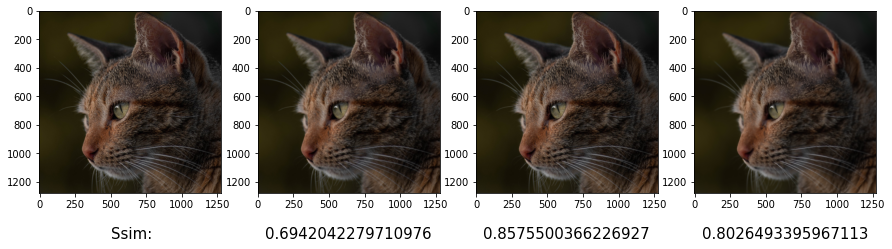

In [82]:
rows = 1
columns = 4
fig = plt.figure(figsize = (15, 15))
fig.add_subplot(rows, columns, 1)
plt.imshow(image)
plt.text(500, 1600, "Ssim:", fontsize = 15)
fig.add_subplot(rows, columns, 2)
plt.imshow(median_blured)
plt.text(50, 1600, ssim_median, fontsize = 15)
fig.add_subplot(rows, columns, 3)
plt.imshow(gaussian_blured)
plt.text(50, 1600, ssim_gaussian, fontsize = 15)
fig.add_subplot(rows, columns, 4)
plt.imshow(bilateral_filter)
plt.text(50, 1600, ssim_bilateral, fontsize = 15)